In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
#start and end dates of the analysis
start_date = '1990-01-01'
end_date = '2022-02-22'

#the ticker that we want to analyze
ticker = 'SPY'

data= yf.download(ticker, start_date, end_date)
data['logScale'] = np.log10(data['Adj Close'])
data['rowNum'] = np.arange(len(data))

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,logScale,rowNum
Date,,,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,25.627350,1003200,1.408704,0
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.809618,480500,1.411782,1
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.864288,201300,1.412701,2
1993-02-03,44.40625,44.84375,44.37500,44.81250,26.137703,529400,1.417267,3
1993-02-04,44.96875,45.09375,44.46875,45.00000,26.247061,531500,1.419081,4


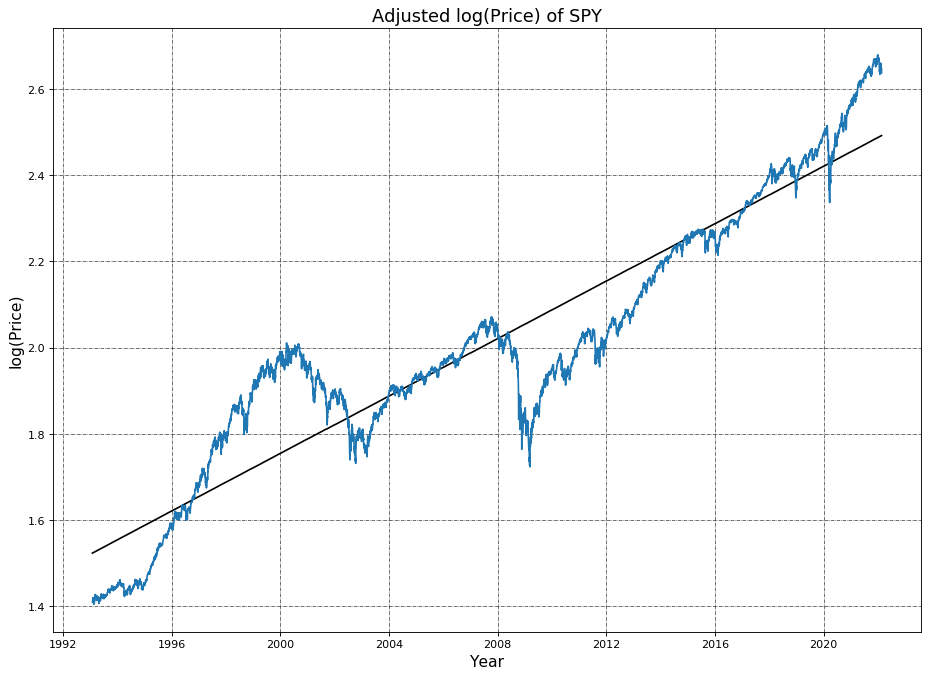

In [136]:
fit = np.polyfit(data['rowNum'], data['logScale'],1)
fit_fn = np.poly1d(fit)
fig = plt.figure(figsize=(13, 9), dpi=80)

ax = fig.add_subplot(111)
ax.plot(figsize=(20, 17))
ax.plot(data.index, fit_fn(data['rowNum']), 'k-')
ax.plot(data.index, data['logScale'])
# Define the label for the title of the figure
plt.title("Adjusted log(Price) of %s" % ticker, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('log(Price)', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

In [130]:
print(fit_fn)

 
0.0001326 x + 1.522


# Ticker growth over time

[*********************100%***********************]  1 of 1 completed


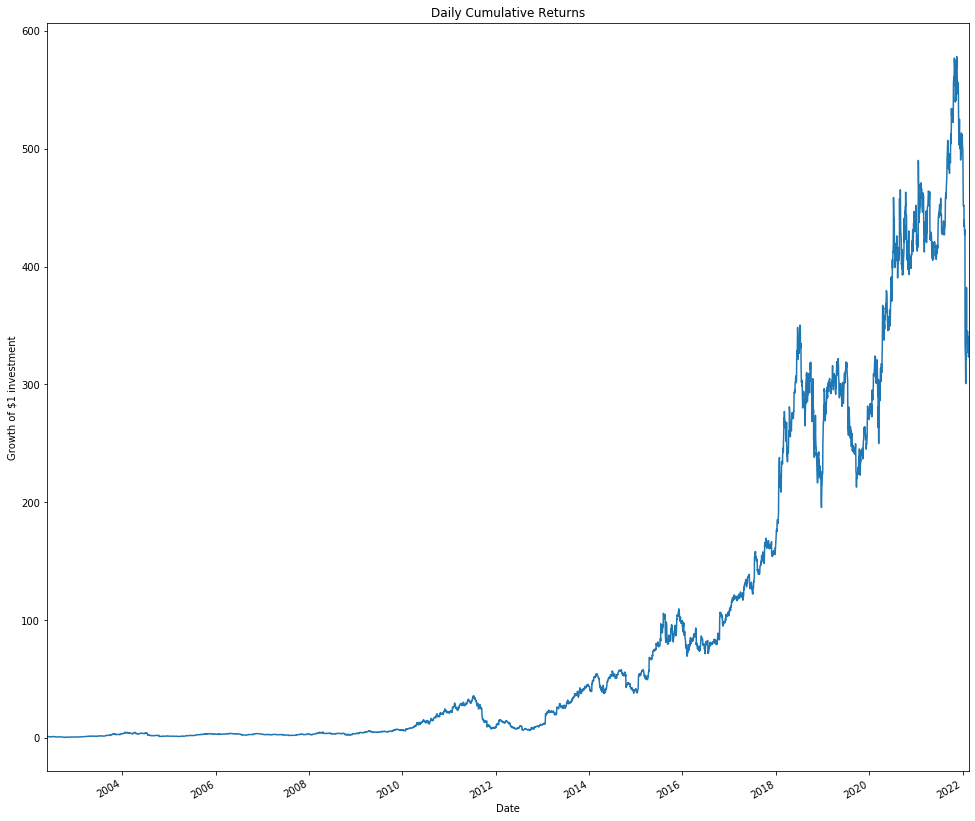

In [12]:
#start and end dates of the analysis
start_date = '1990-01-01'
end_date = '2022-02-22'

#the ticker that we want to analyze
ticker = 'NFLX'

data= yf.download(ticker, start_date, end_date)
daily_returns = data['Adj Close'].pct_change()
cum_returns = (daily_returns + 1).cumprod()
fig = plt.figure(figsize=(13,9))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Daily Cumulative Returns")
plt.show()


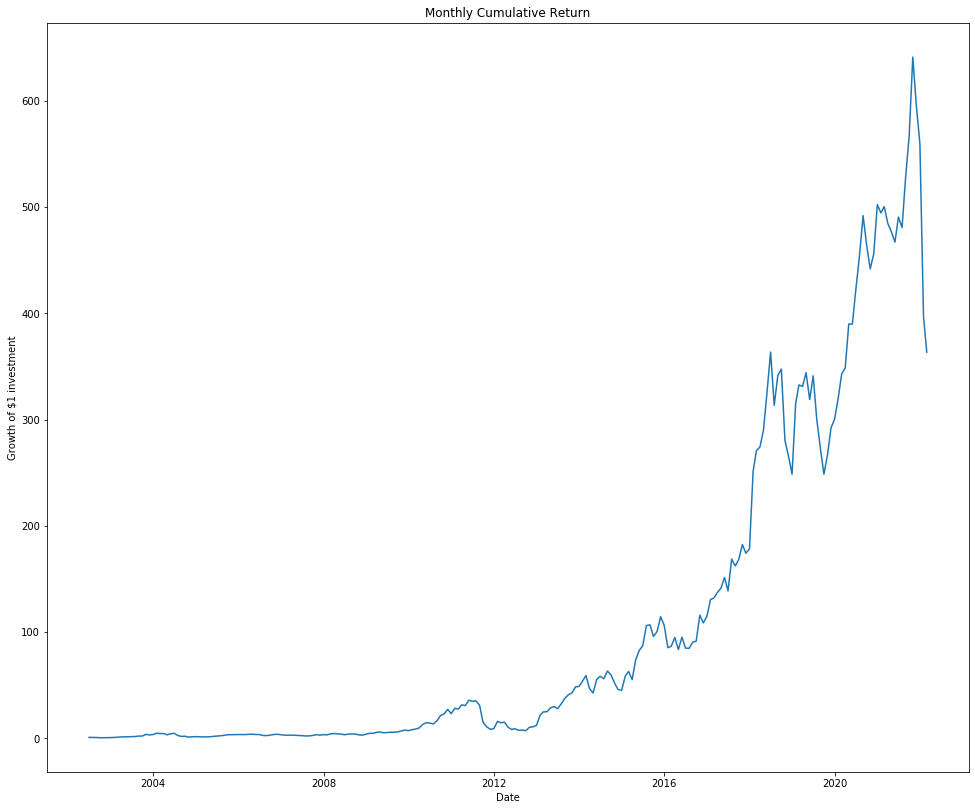

In [13]:
#monthly return data to get a smoother function
fig = plt.figure(figsize=(13,9))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
monthly_returns = data['Adj Close'].resample('M').ffill().pct_change()
monthly_cum_returns = (monthly_returns + 1).cumprod()
ax1.plot(monthly_cum_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Monthly Cumulative Return")
plt.show()